# Data Analysis

Analyse the data set with PCA and train a machine learning classifier on it. 

The provided dataset contains a feature space that describes various odorant molecules. It contains 184 numerical features describing physico-chemical parameters of 627 odorants. The target values indicate whether an odorant has a "fruity" smell. 


Load the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
def load_competition_training_data():
    train_df = pd.read_json('train_data.json')
    y = train_df['targets']
    train_df.drop('targets', axis=1, inplace=True)
    X = train_df.values
    return X,y

X_train, y_train = load_competition_training_data()



Analysis with PCA 
Transform the training data in `X_train` such that covariance is identical to correlation. 

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Before Scaling:")
print('per-column variance:')
print(np.var(X_train, axis=0))


# sklearn standard scaler in action to transform X_train such that covariance is identical to correlation
scaler = StandardScaler()
scaler.fit(X_train) # 'learns' mean and variance of a
X_train_scaled = scaler.transform(X_train) # 'transforms' a

print("After Scaling:")
print('per-column variance:')
print('{}'.format(np.var(X_train_scaled, axis=0)))
pass

Before Scaling:
per-column variance:
[1.01373613 0.99992678 0.97687431 1.03530002 0.99598301 1.00129153
 1.06978118 1.03245389 0.96589153 1.0089758  1.01649791 0.94574525
 0.9716721  1.01070336 1.00594372 0.94467689 0.96519305 1.01706822
 1.01868779 0.94424382 0.75542895 0.99706526 1.01107104 0.95154881
 1.02618032 1.0005571  0.99430521 0.95490882 0.94449331 0.99337671
 1.00772775 0.95530089 1.02691052 0.99030715 1.01879754 0.95835026
 0.97918357 1.00818974 0.99445805 1.02664559 0.99298812 0.96899837
 1.01184533 0.99727738 0.97966702 0.44480099 1.00605212 0.98671717
 1.01410873 0.98706861 0.99032223 0.         0.         1.00238443
 1.02057428 1.02806773 1.02523474 0.         1.3312068  1.00867113
 0.         0.         0.         0.92871945 1.01440974 0.
 0.98627927 1.03473683 1.01387624 0.99639476 1.03079892 1.00044079
 0.66640149 1.00006066 1.00392513 1.02900389 0.99674553 1.02391608
 0.99214853 0.97662082 1.00250407 0.99480995 1.01190754 1.05926609
 1.05304227 1.07015398 1.01251651

Perform a PCA on the transformed data. 

In [5]:
from sklearn.decomposition import PCA

#Fit and transform scaled data using pca
pca = PCA().fit(X_train_scaled)
X_Pca = pca.transform(X_train_scaled)

pass


Produce a scatter plot of the first two principal components.

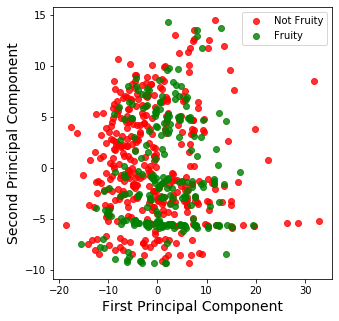

In [6]:
labels=y_train

#Assign colors to each label
cdict={0:'red',1:'green'}

#Assign class labels to 0 and 1
#After research it is found that the '0' represents 'Not Fruity' and '1' represents 'Fruity' 
labl={0:'Not Fruity',1:'Fruity'}

# plotting area should be square
fig,ax=plt.subplots(figsize=(5,5))

for l in np.unique(labels):
    i=np.where(labels==l)
    ax.scatter(X_Pca[i,0],X_Pca[i,1],c=cdict[l],label=labl[l],alpha=0.8)

# Assign axis-labels
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)

plt.legend()
plt.show()
pass

In [7]:

expl_var = pca.explained_variance_ratio_

#principal components are required to explain 90% of the variance
n= 0
var_sum = 0
while var_sum<=0.90:
    var_sum += expl_var[n]
    n += 1

print("The number of principle components required to explain 90% of the variance:",n)


The number of principle components required to explain 90% of the variance: 19


It is impossible to separate the data into two classes(Fruity and Non-Fruity) in a 2-dimensional Principal Component space using linear classifier as the samples are cra not linearly separable in a 2D space.
In the above scatter plot (2D-PC space), the target values cannot be separated by a line, hence cannot plot a hyperplane that separate one class from another in 2D space. The data points are no correlated.
Although linear classifier can be used to classify after transforming the data to a higher dimensional space. 

#covariance matrix

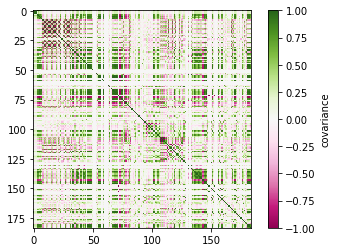

In [8]:
#Plot covariance matrix

ax = plt.gca()
cov_mat = pca.get_covariance()
img = ax.imshow(cov_mat, cmap='PiYG', vmin=-1, vmax=1)
plt.colorbar(img, label='covariance')

#PCA components matrix

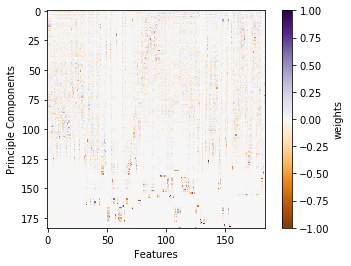

In [9]:
#Plot PCA Components matrix
compts = pca.components_

ax = plt.gca()
img = ax.imshow(compts, cmap='PuOr', vmin=-1, vmax=1)
plt.colorbar(img, label="weights")
ax.set_ylabel('Principle Components')
ax.set_xlabel('Features')
pass


#Analyse the two plots.

The covariance matrix and component matrix is plotted with a colormap, having different colors that represent the numerical values of covariance and weighted sum of data vectors denoted as 'weights', respectively. 

From the covariance matrix plotted, it is clear that there are many features that are independent to each other (zero covariance). Considering the first 25 features in the matrix, almost first 10 features have covariance ranging from zero to 1 (high covariance) and the remaining few features are less correlated with covariance ranging  -1 to 0. As we have normalized the data into unit variance, the variance along diagonal is 1.  Thus the covariance matrix shows how different features in the dataset are correlated.

In the component matrix, the first 125 principal Components shows some relation and the remaining components are almost uncorrelated to most of the features in the dataset. The component matrix is weakly represented. If the ‘vmax’ and ‘vmin’ were set to a lesser value, say, 0.1 and  - 0.1, the graph would have been more representable. It is difficult to interpret the data in a meaningful way.



#### Optimise a neural network 

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
param_dict = {
    "hidden_layer_sizes":(10,5), 
    "activation":'relu',
    "solver":'sgd',
    "max_iter": 1500
}


X_train_nn = X_Pca[:,:19]

#test the network's performance.

In [11]:
from sklearn import neural_network as nn
import sklearn.model_selection as ms
import numpy.random as nr
nr.seed(12345)
mlp = nn.MLPClassifier(**param_dict)
scores = ms.cross_val_score(mlp, X_train_nn, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7543 (+/- 0.0620)
